In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

%matplotlib widget
%matplotlib inline
%matplotlib nbagg
%matplotlib tk

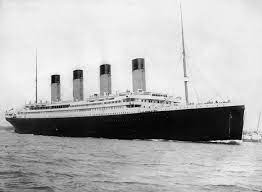

In [2]:
test=pd.read_csv("C:/Users/rafae/OneDrive/Escritorio/Badededatosexcel/titanic/test.csv")
df=pd.read_csv("C:/Users/rafae/OneDrive/Escritorio/Badededatosexcel/titanic/train.csv")

# Overview

### The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

#### Overview
#### The data has been split into two groups:
#### training set (train.csv)
#### test set (test.csv)
#### The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.
#### The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.
#### We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

# Data Dictionary

#### Variable: Definition
#### survival: Survival
#### pclass: Ticket class
#### sex: Sex
#### Age: Age in years
#### sibsp: num of siblings / spouses aboard the Titanic
#### parch: num of parents / children aboard the Titanic
#### ticket: Ticket number
#### fare: Passenger fare
#### cabin: Cabin number
#### embarked: Port of Embarkation


# Read files

In [3]:
test.shape

(418, 11)

In [4]:
df.shape

(891, 12)

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing values

In [6]:
df[df.columns[df.isnull().any()]].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

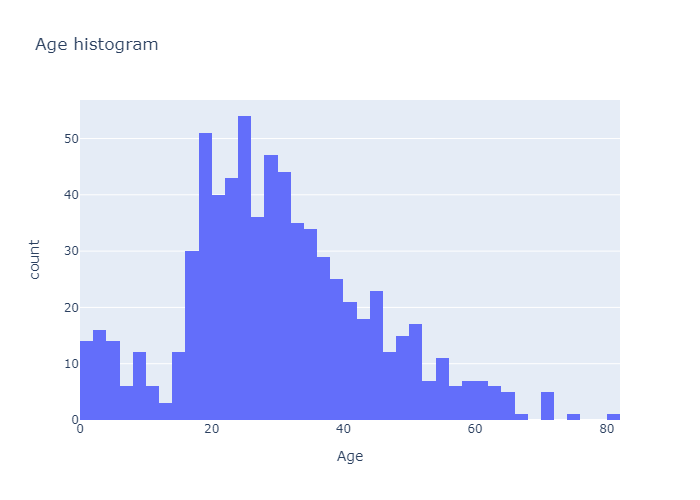

In [7]:
fig=px.histogram(df,x="Age",title="Age histogram")
fig.show("png")

In [8]:
age=df["Age"].value_counts().reset_index()
age=age.rename(columns={"index":"Age","Age":"Counts"})
age.head(3)


,Age,Counts
0,24.0,30
1,22.0,27
2,18.0,26


In [9]:
df["Age"]=df["Age"].fillna(24)
test["Age"]=test["Age"].fillna(24)

In [10]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
df["Cabin"]=df["Cabin"].fillna("NotAvailable")
df["Embarked"]=df["Embarked"].fillna("NotAvailable")

In [12]:
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

# Data analisis

In [13]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotAvailable,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NotAvailable,S


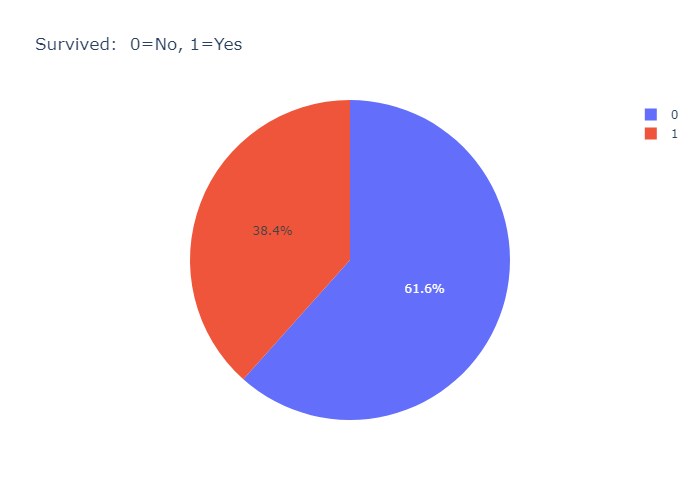

In [14]:
dfr= df["Survived"].value_counts().reset_index()
fig = px.pie(dfr, values='Survived', names="index",title="Survived:  0=No, 1=Yes",labels={"index":"Survived","Survived":"Counts"})
fig.show("png")

#### We can see that most of the people did not survive as only 38% survived

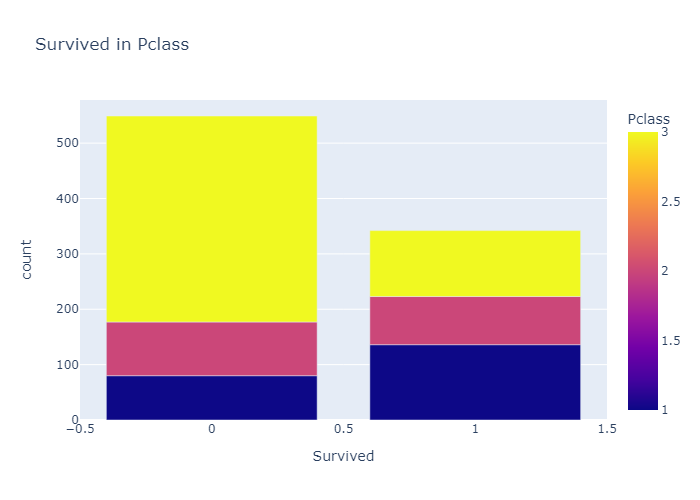

In [15]:
a=pd.DataFrame(df.groupby(["Survived","Pclass"]).size().reset_index(name="count"))
fig=px.bar(a,x="Survived",y="count",color="Pclass",title="Survived in Pclass")
fig.show("png")

#### It can be seen that most of the people who survived are from class 1

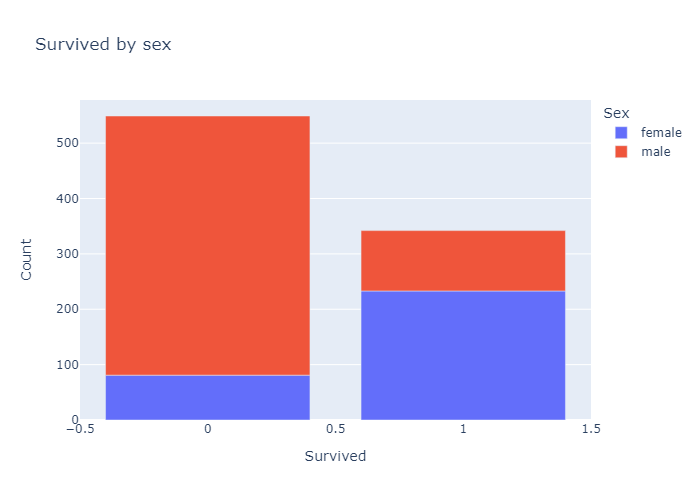

In [16]:
a=pd.DataFrame(df.groupby(["Survived","Sex"]).size().reset_index(name="Count"))
fig=px.bar(a,x="Survived",y="Count",color="Sex",title="Survived by sex")
fig.show("png")

#### Most of the people who survived were women

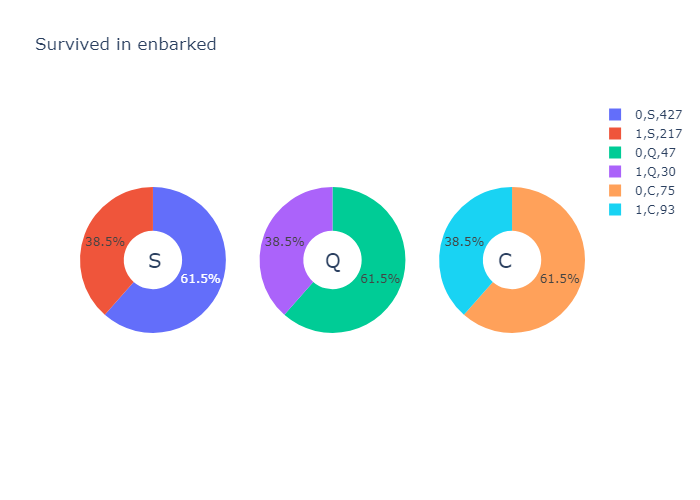

In [17]:

from plotly.subplots import make_subplots

a=pd.DataFrame(df.groupby(["Survived","Embarked"]).size().reset_index(name="Count"))

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{"type":"domain"}]])

fig.add_trace(go.Pie(labels=a[a["Embarked"]=="S"], values=a["Count"], name="Survived = No"),
              1, 1)
fig.add_trace(go.Pie(labels=a[a["Embarked"]=="Q"], values=a["Count"], name="Survived = Yes"),
              1, 2)
#
fig.add_trace(go.Pie(labels=a[a["Embarked"]=="C"], values=a["Count"], name="Survived = Yes"),
              1, 3)

fig.update_traces(hole=.4, hoverinfo="label")

fig.update_layout(
    title_text="Survived in enbarked",
   
    annotations=[dict(text='S', x=0.13, y=0.5, font_size=20, showarrow=False),
                 dict(text='Q', x=0.50, y=0.5, font_size=20, showarrow=False),
                 dict(text='C', x=0.86, y=0.5, font_size=20, showarrow=False)])
fig.show("png")

#### The variable embarked is divided into three types that are s,q,c but it is not noticeable that one is more important than another, they are divided into the same percentages.

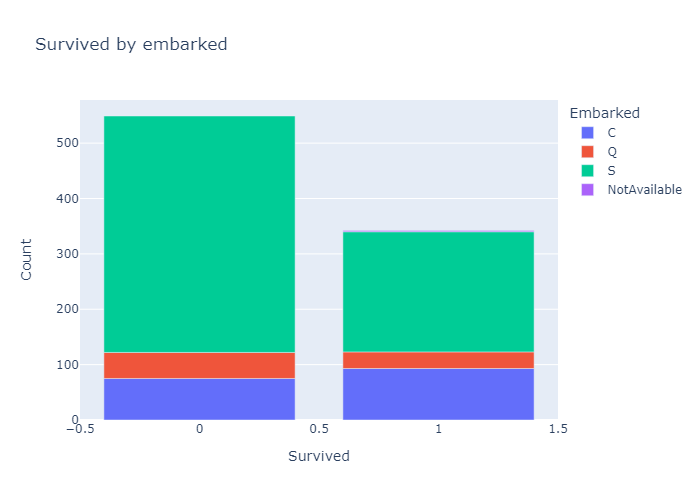

In [18]:
a=pd.DataFrame(df.groupby(["Survived","Embarked"]).size().reset_index(name="Count"))
fig=px.bar(a,x="Survived",y="Count",color="Embarked",title="Survived by embarked")
fig.show("png")

#### By analyzing the variable survived with the variable embarked we can see that most people are of the s class

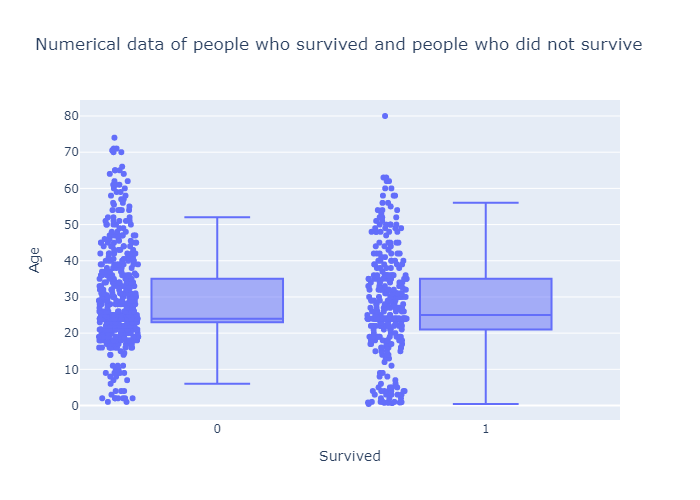

In [19]:
dfr = df
fig = px.box(dfr, x="Survived", y="Age", points="all",title="Numerical data of people who survived and people who did not survive")
fig.show("png")

#### The average number of people who survived was 25 years while those who did not survive was 24

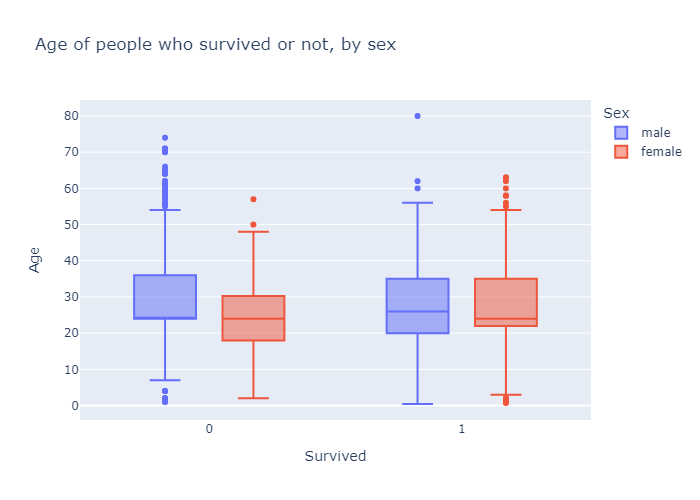

In [20]:
dfr = df
fig = px.box(dfr, x="Survived", y="Age", color="Sex",title="Age of people who survived or not, by sex")
fig.update_traces(quartilemethod="exclusive") 
fig.show("png")

#### The ages of the men who did not survive are greater than those who survived.

C:\Users\rafae\Downloads\anacondescarga\envs\tensorflow\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\rafae\Downloads\anacondescarga\envs\tensorflow\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\rafae\Downloads\anacondescarga\envs\tensorflow\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



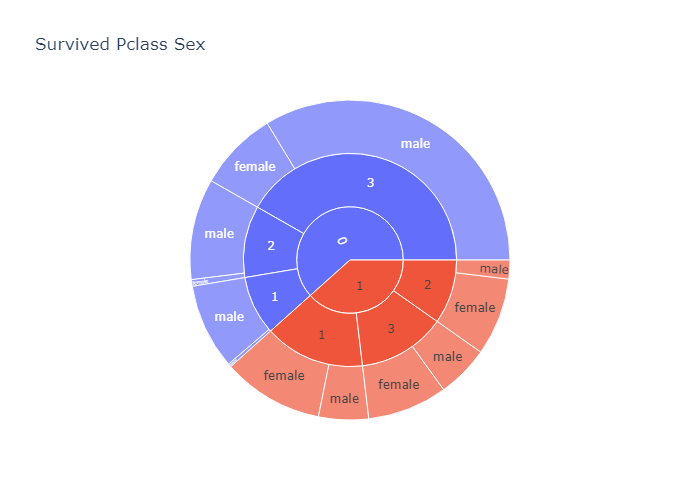

In [21]:
dfr = pd.DataFrame(df.groupby(["Survived","Pclass","Sex"]).size().reset_index(name="Counts"))
fig = px.sunburst(dfr, path=["Survived","Pclass","Sex"], values='Counts',title="Survived Pclass Sex")
fig.show("png")

#### Most of the people who survived were women from class 1, while the majority of people who died were men from class 3.

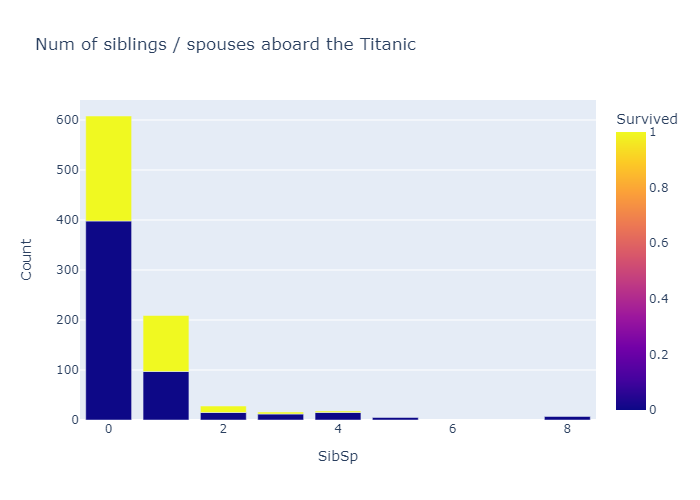

In [22]:
a=pd.DataFrame(df.groupby(["Survived","SibSp"]).size().reset_index(name="Count"))
fig=px.bar(a,x="SibSp",y="Count",color="Survived",title=" Num of siblings / spouses aboard the Titanic")
fig.show("png")

#### We can see that most people did not have siblings and this variable does not have much weight when making the model.

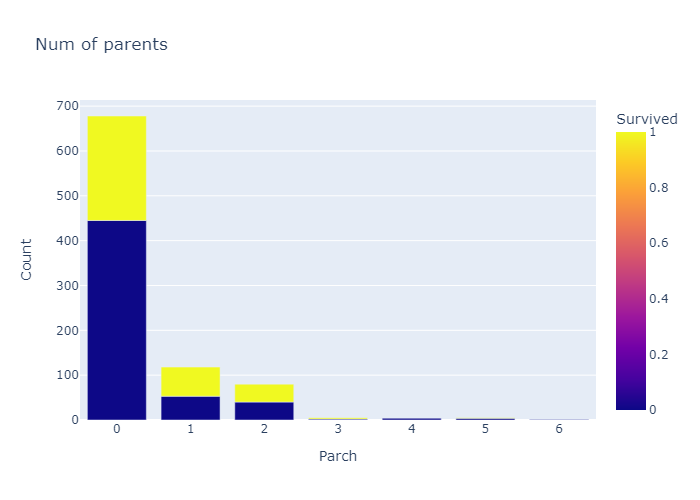

In [23]:
a=pd.DataFrame(df.groupby(["Survived","Parch"]).size().reset_index(name="Count"))
fig=px.bar(a,x="Parch",y="Count",color="Survived",title="Num of parents")
fig.show("png")

#### Like the siblings variable, the number of parents does not have much influence on survival.

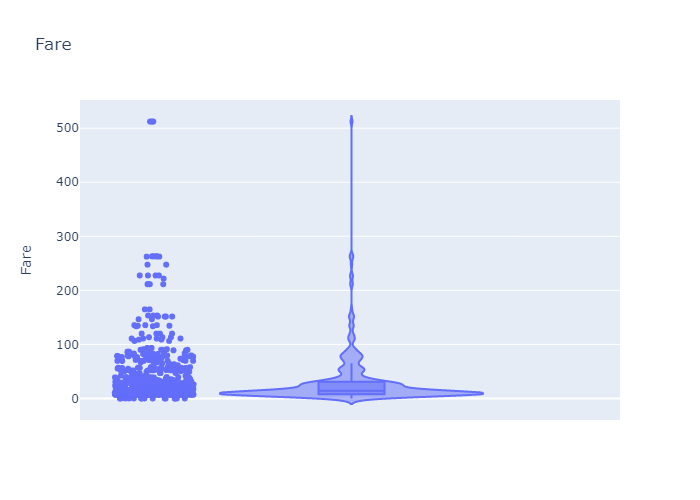

In [24]:
dfr = df["Fare"]
fig = px.violin(dfr, y="Fare", box=True, # draw box plot inside the violin
                points='all', 
                title="Fare"
               )
fig.show("png")

#### It tells us that the average cost was 14.45. We can see that there are people who cost zero for the ticket, in addition to the fact that the most expensive tickets cost about 512, although most of the tickets cost less than 30.

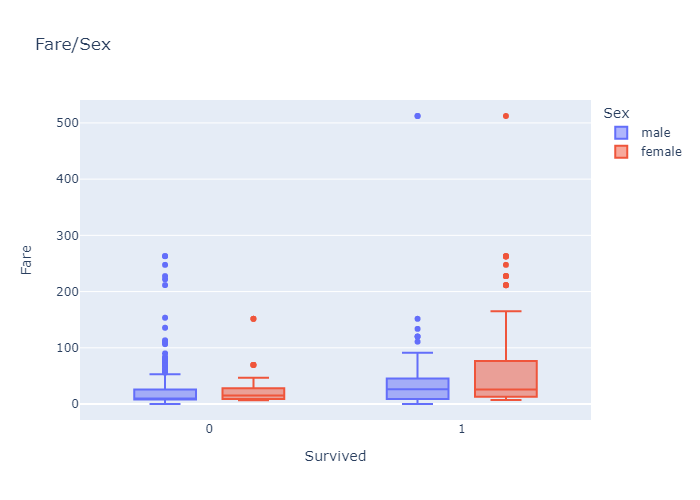

In [25]:
dfr = df
fig = px.box(dfr, x="Survived", y="Fare", color="Sex",title="Fare/Sex")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show("png")

#### When comparing the variable of surviving and of not surviving, it can be clearly seen that the prices of the tickets were higher in the people who survived. In addition, we can see that the average price of men who died is three times lower than the average price of men. who survived.

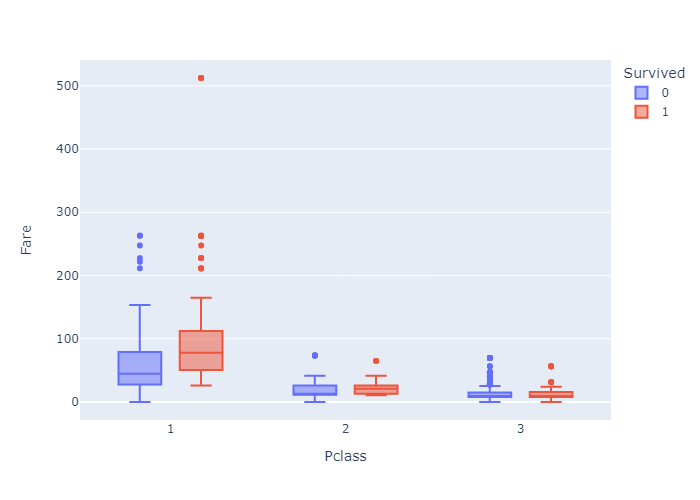

In [26]:
dfr = df
fig = px.box(dfr, x="Pclass", y="Fare", color="Survived")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show("png")


#### Here we can see that the classes are divided by prices and that the most expensive prices are in class 1 while those in class 3 are the cheapest.

### Conclusions
#### We can see that of all the passengers on board only 38% survived
#### Most of the people who survived were from pclass 1 while the majority of people who did not survive were from pclass 3
#### Most of the dead were men, most of the living were women.
#### Only 13% of the men who were in class 3 survived, while of all the combinations between classes and gender, the majority of people who did not survive were the men of class 3, class 2 did not have as many women who died + n only 6 while class one only died 3.
#### So far it seems that class level 1 and being a woman have a lot to do with surviving
#### In the percentages of the shipments we can notice that the distribution in the ports in percentage is equitable. The three ports have the same percentages, therefore I think that the ports do not affect much
#### The average age of people who did not survive was 24 and of people who survived was 25
#### The average age between men and women
#### Of the people with relatives on board, most of those who were saved did not have any relatives
#### The passengers with the highest average fare are those who were saved
#### Class one is the most expensive class and that is related to those who were saved in general by dividing into class the people with the most expensive tickets were the ones who were saved

## With the information I have, I could predict that the variables that have the most influence among the columns to be predicted are sex and pcclass.
## The ones that have less influence between the data to be predicted are ticket, cabin and name.

# Feature engineering

## Mutual information score.

In [27]:
X=df.copy()
y=X.pop("Survived")
  
for colname in X.select_dtypes("object"):
 X[colname], _= X[colname].factorize()
discrete_features= X.dtypes==int   
 

In [28]:
from sklearn.feature_selection import mutual_info_regression 
                                        
def make_mi_scores (X,y,discrete_features):
    mi_scores=mutual_info_regression(X,y,discrete_features=discrete_features)
    mi_scores=pd.Series(mi_scores,name="MI scores",index=X.columns)
    mi_scores=mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

Sex            0.157147
Fare           0.143548
Ticket         0.089417
Pclass         0.086903
Cabin          0.070948
Parch          0.042812
SibSp          0.033856
PassengerId    0.017821
Name           0.017056
Embarked       0.013761
Age            0.012962
Name: MI scores, dtype: float64

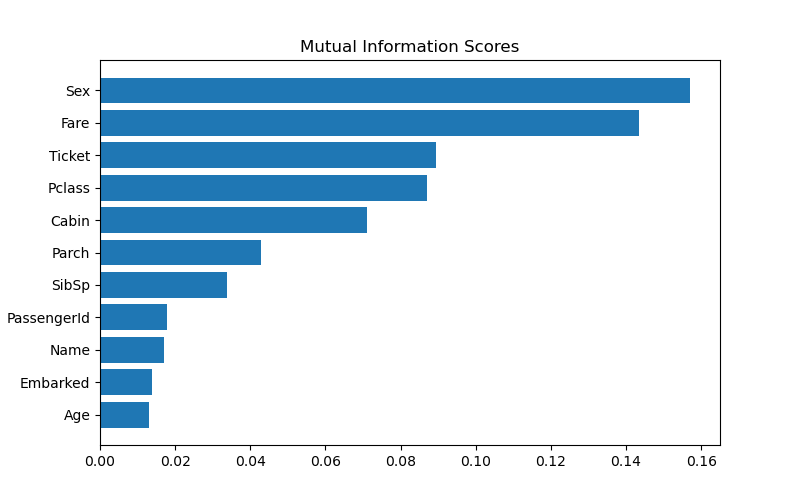

In [29]:
def plot_mi_scores(scores):
    scores=scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
    
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)    
    

## With this information I can realize that some data is not so necessary for the ML but I can remove it and see how the Mutal information goes without the columns that I remove
## I can tell that when performing the comparisons in mutual information it is interfered since we are not using numeric variables and we have to convert the columns

In [30]:
df1=df.copy()
tst=test.copy()

In [31]:
sex_binary={"male":0,"female":1}
Embarked_binary={"C":0,"Q":1,"S":2,"NotAvailable":3}
                                

In [32]:
df1["Sex"]=df1["Sex"].replace(sex_binary)
df1["Embarked"]=df1["Embarked"].replace(Embarked_binary)
tst["Sex"]=tst["Sex"].replace(sex_binary)

In [33]:
X1=df1.copy()
y1=X1.pop("Survived")
  
for colname in X1.select_dtypes("object"):
 X1[colname], _= X1[colname].factorize()
discrete_features1= X1.dtypes==int   

In [34]:
mi_scores = make_mi_scores(X1, y1, discrete_features)
mi_scores

Sex            0.155908
Fare           0.110364
Ticket         0.085611
SibSp          0.060353
Cabin          0.050965
Pclass         0.026869
Age            0.020719
Name           0.017927
PassengerId    0.015470
Embarked       0.006781
Parch          0.000000
Name: MI scores, dtype: float64

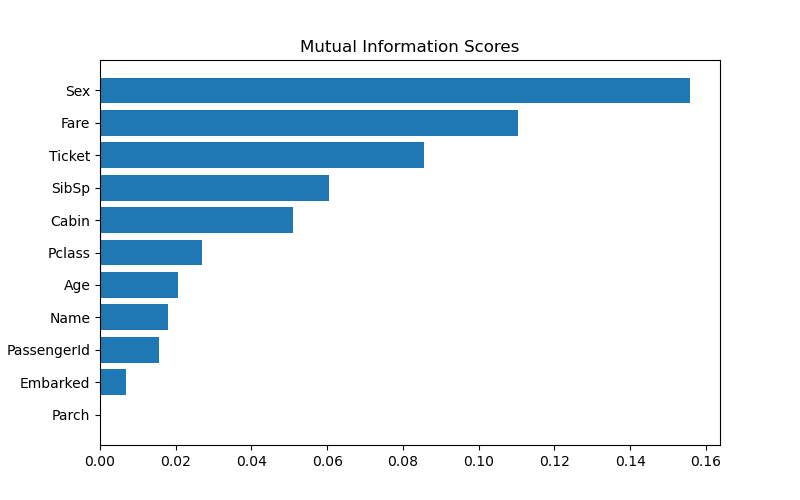

In [35]:
def plot_mi_scores(scores):
    scores=scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
    
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)   

## This is a better graph and closer to the predictions I had according to the graphs

# Machine Learning Model

## DecisionTreeModel

In [36]:
df_features=["Fare","Sex","Age","Pclass"]
y = df1.Survived

In [37]:
X = df1[df_features]

In [38]:
from sklearn.tree  import DecisionTreeRegressor

In [39]:
df_model=DecisionTreeRegressor(random_state=1)

In [40]:
df_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [41]:
print("Making predictions for the following 5 passengers:")
print(X.head())
print("The predictions are")
print(df_model.predict(X.head()))

Making predictions for the following 5 passengers:
      Fare  Sex   Age  Pclass
0   7.2500    0  22.0       3
1  71.2833    1  38.0       1
2   7.9250    1  26.0       3
3  53.1000    1  35.0       1
4   8.0500    0  35.0       3
The predictions are
[0. 1. 1. 1. 0.]


## Validation data

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [43]:
train_x , val_x , train_y , val_y = train_test_split(X ,y , random_state=0)
df_model=DecisionTreeRegressor()
df_model.fit(train_x,train_y)

DecisionTreeRegressor()

In [44]:
val_prediction=df_model.predict(val_x)

print("The total validation data is: ")
print(mean_absolute_error(val_y,val_prediction))

The total validation data is: 
0.19409566517189836


## I decided to use DecisionTree because it was the model that adjusted to the characteristics that I wanted since, by having only the variables that had the most influence on the prediction of survival, and there being only 4 that I took, it seemed like a good idea to me that a tree of 4 levels, in the end my result was: Score: 0.74641 that is 74%. Which indicates that it could improve just a little more by adding new techniques such as Underfitting and Overfitting. But just to take into account the model and for practice that consisted in making a prediction, I think the result was very good by itself, the chosen variables did have the necessary influence on the dataset and the model fulfilled the function for the most part.